# Logistic Regression

Predict whether he/she will be default or not based on saveral features

In [1]:
#IMPORT PACKAGES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('default.csv')

In [3]:
#view first six rows of dataset
data[0:6]

#find total observations in dataset
len(data.index)

10000

In [4]:
data.shape

(10000, 4)

In [5]:
data.describe()

,default,student,balance,income
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033300,0.294400,835.374886,33516.981876
std,0.179428,0.455795,483.714985,13336.639563
min,0.000000,0.000000,0.000000,771.967729
25%,0.000000,0.000000,481.731105,21340.462905
50%,0.000000,0.000000,823.636973,34552.644800
75%,0.000000,1.000000,1166.308387,43807.729275
max,1.000000,1.000000,2654.322576,73554.233500


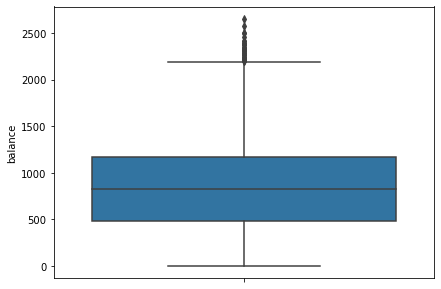

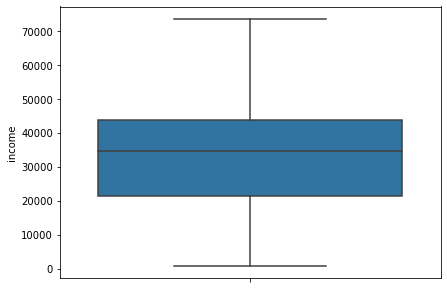

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=data['balance'])

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=data['income'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


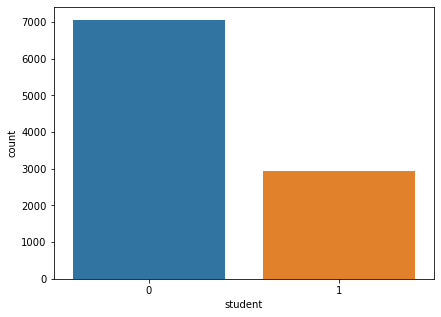

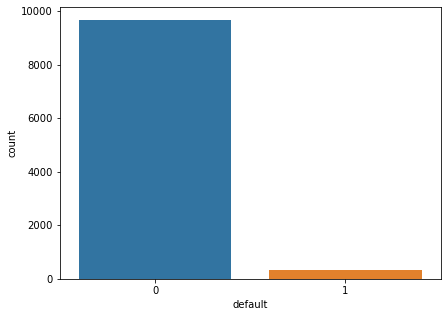

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.countplot(data['student'])

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.countplot(data['default'])
plt.show()

In [8]:
data['student'].value_counts()

0    7056
1    2944
Name: student, dtype: int64

In [9]:
data['default'].value_counts()

0    9667
1     333
Name: default, dtype: int64

In [10]:
data['student'].value_counts(normalize=True)

0    0.7056
1    0.2944
Name: student, dtype: float64

In [11]:
data['default'].value_counts(normalize=True)

0    0.9667
1    0.0333
Name: default, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


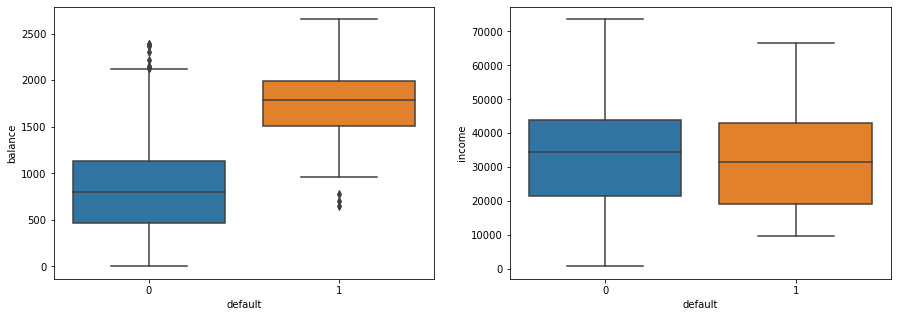

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data['default'],data['balance'])

plt.subplot(1,2,2)
sns.boxplot(data['default'],data['income'])
plt.show()

In [13]:
pd.crosstab(data['student'],data['default'],normalize='index').round(2)

default,0,1
student,,
0,0.97,0.03
1,0.96,0.04


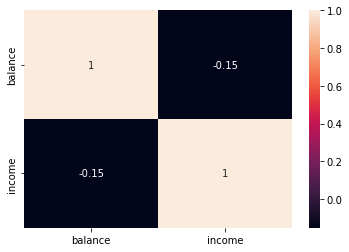

In [14]:
sns.heatmap(data[['balance','income']].corr(),annot=True)
plt.show()

In [15]:
data.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

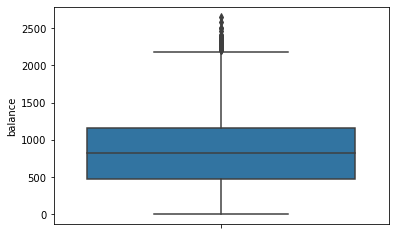

In [16]:
sns.boxplot(y=data['balance'])
plt.show()

In [17]:
#FIT LOGISTIC REGRESSION MODEL
X = data[['student', 'balance','income']]
y_transformed = data['default']

In [18]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y_transformed,test_size=0.3,random_state=0)

In [19]:
#instantiate the model
log_regression =LogisticRegression()

In [20]:
#fit the model
y_pred = log_regression.fit(X_train,y_train)
y_pred

LogisticRegression()

In [21]:
#use model to make predictions on test data
y_pred = log_regression.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
#MODEL DIAGNOSTICS
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9633333333333334


In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test,y_pred)

array([[2870,   17],
       [  93,   20]], dtype=int64)